---
layout: post
title:  "Linear Support Vector Machine (SVM)"
date:   2021-06-06 2:30:54 +0700
categories: MachineLearning
---

# TOC
- [Introduction](#intro)
- [Code example](#code)

# Introduction <a name="intro"></a>

Remember the linear combination of weights $$\theta$$ and input features x:

$$ \hat{y}=h_{\theta}(x) = \theta \cdot x $$

Think about all the times we wrap this linear combinations in a nonlinear function to activate it (it here means the linear combination, it could be translated as to activate a neuron in deep learning context). In this post we would browse different nonlinear functions that ouput classes instead of a value, to serve the problem of classifying input data into classes. Let's consider a binary classifer called linear support vector machine (SVM).

## Sign function

Linear Support Vector Machine is the problem that it find a separating line for data points (hence classification). There are 2 classes hence we use a sign function with a hinge loss. A perceptron is also a linear classification problem that uses the sign hypothesis function but it uses a different loss function. A sign function is named so since it outputs the sign of the value of the linear combination:

$$ sign(\hat{y}) = 
\begin{cases}
        -1 & \text{if $\hat{y}$ < 0}\\
        +1 & \text{if $\hat{y}$ > 0}\\
        0 & \text{if $\hat{y}$ = 0}\\
\end{cases}
$$

The decision boundary according to x for this classification problem is $$ \hat{y} = \theta \cdot x = 0 $$

## Loss functions and their gradients

### Zero-one loss function

The loss function for the sign function is a zero-one loss function. Which means that if we output the correct sign, the loss is 0, if we output the incorrect sign, the loss is 1. The loss function for a single point of the data is: 

$$ Loss_{0-1}(x,y,\theta) = 1[\hat{y} \ne y] $$

$$ 1[...] $$ is a function such that if the inside statement is true, it returns value 1, if false, it returns 0. For the whole training dataset, we simply take average of those smaller loss functions. There are two more concepts that we need to know: the score and the margin. The score is $$ \theta \cdot x $$ and it is how confident we are in predicting the positive class. The margin is $$ (\theta \cdot x)y = \hat{y} y $$ and it shows how correct we are. Since the margin takes into account the largeness of prediction and true value, we use it as the loss function instead of the not-equal comparison. Actually they are equivalent:

$$ Loss_{0-1}(x,y,\theta) = 1[\hat{y} \ne y] $$

$$ \Leftrightarrow Loss_{0-1}(x,y,\theta) = 1 [(\theta \cdot x) y <= 0 ] $$

Consider 3 data points with 2 features:

|$$x_1$$|$$x_2$$|y|
|--|--|--|
|3|-1|+1|
|2|3|+1|
|-1|0|-1|

Take two random parameters values:

|$$\theta_1$$|$$\theta_2$$|
|--|--|
|0.5|3|


In [1]:
import numpy as np
x=[[3,-1],[2,3],[-1,0]]
theta=[[.5],[3]]
yhat=np.dot(x,theta)
yhat

array([[-1.5],
       [10. ],
       [-0.5]])

Here is the zero-one losses for 3 such data points:

|$$ x_1 $$|$$ x_2 $$|y|$$ h_{\theta} $$|$$ \hat{y}=sgn(h_{\theta}) $$|zero-one loss|
|--|--|--|--|--|--|
|3|-1| -1.5|+1|-1|1|
|2|3| 10|+1|+1|0|
|-1|0| -0.5|-1|-1|0|

The training loss is the average of the 3 smaller losses and equals $$ \frac{1}{3}$$.

Now we can plot the loss function, for all margin values that are negative, the loss is 1. For all margin values that are non negative, the loss is 0.

<img width="339" alt="LinClass" src="https://user-images.githubusercontent.com/7457301/224597096-37846d67-d9a6-4940-bffb-d6325cb3657c.png">
<p style="font-size:9px">Source: https://stanford-cs221.github.io/autumn2022/modules/module.html#include=machine-learning/linear-classification.js&mode=print1pp</p>

Remember that the total loss of the whole training set is the average of all the loss zero-one function for each data point, hence the gradient of the total loss depends on the total gradient of all smaller loss functions, apart from the scalar of dividing by the size of the training set (for averaging calculation). Here is the total of smaller gradients:

$$ \nabla_{\theta} Loss_{0-1}(x,y,\theta) = \nabla 1 {[(\theta \cdot x) y <= 0 ]} $$

Gradient of this loss function is almost zero everywhere, except for the point where margin = 0, at that point gradient is infinite. This is hard in updating the parameters hence optimization.


### Hinge loss function

To account for that, we use the hinge loss function:

$$ Loss_{hinge} (x,y,\theta) = max\{1 - margin, 0\} $$

<img width="460" alt="LinClass2" src="https://user-images.githubusercontent.com/7457301/224625191-51e6e9f9-f702-448b-8747-0585771bb527.png">

<p style="font-size:9px">Source: https://stanford-cs221.github.io/autumn2022/modules/module.html#include=machine-learning/linear-classification.js&mode=print1pp</p>

When margin >= 1 (when we are correct), the loss function equals 0. When margin < 1, the loss decreases gradually (linearly). 

|$$ x_1 $$|$$ x_2 $$|y|$$ h_{\theta} $$|$$ \hat{y}=sgn(h_{\theta}) $$|zero-one loss|margin=$ \hat{y}{y} $|hinge|
|--|--|--|--|--|--|--|--|
|3|-1| -1.5|+1|-1|1|1.5|0|
|2|3| 10|+1|+1|0|10|0|
|-1|0| -0.5|-1|-1|0|0.5|0.5|

We have the total loss on the training set to be $$ \frac{1}{6}$$.

For gradient, the gradient of the hinge loss is better than the zero-one loss function:

$$ \nabla Loss_{hinge}(x,y,\theta) = 
\begin{cases}
    -xy & \text{if 1 - margin > 0}\\
    0 & \text{otherwise}
\end{cases}
$$

We said 0 otherwise since it is mostly otherwise. At the exact 0, the gradient doesn't exist since the left derivative and the right derivative don't match (the function is abrupt at that point).

Let's compare zero-one loss and hinge loss. In zero-one loss, the prediction is exact: either you hit or you miss, and you score accordingly. But in hinge loss, we don't just use the margin, we use $$ 1 - margin $$, so we aim for some positive margin even when we already predict correctly. That changes the loss a bit fundamentally.

### Logistic loss

Logistic loss function graph descends smoother than hinge loss function graph. And this loss functions only goes towards 0, it never reaches 0.

$$ Loss_{logistic}(x,y,\theta) = log(1+e^{-(\theta \cdot x)y}) $$

# Code example <a name="code"></a>

Let's use the wine dataset in the sklearn's repository. Since we have 13 features, to make the visualizing example, we would choose two most significant features using linear regression. We also collapse the target from 3 categories to 2. Then we run the support vector machine algorithm from sklearn and plot the decision boundary.

In [2]:
from sklearn.datasets import load_wine
data = load_wine()
X=data.data
y=data.target
from sklearn.linear_model import LinearRegression
np.set_printoptions(suppress=True)
lr = LinearRegression()
lr = lr.fit(X,y)
lr.coef_

array([-0.11700384,  0.03017099, -0.14855216,  0.03985434, -0.00048977,
        0.14432013, -0.37239141, -0.30347431,  0.03935653,  0.07562387,
       -0.14924506, -0.2700542 , -0.00070114])

In [3]:
X_new = X[:,6]
X_new=np.append(X_new, X[:,6])
y_new= []

for element in y:
  if element > 1:
    y_new.append(1)
  else:
    y_new.append(0)

In [4]:
X_new = []
X_new.append(X[:,6])
X_new.append(X[:,7])
X_new=np.array(X_new).transpose()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [6]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', C = 1e5) # just a big number 
clf.fit(X_train, y_train) 
y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9722222222222222

NameError: name 'svc_model' is not defined

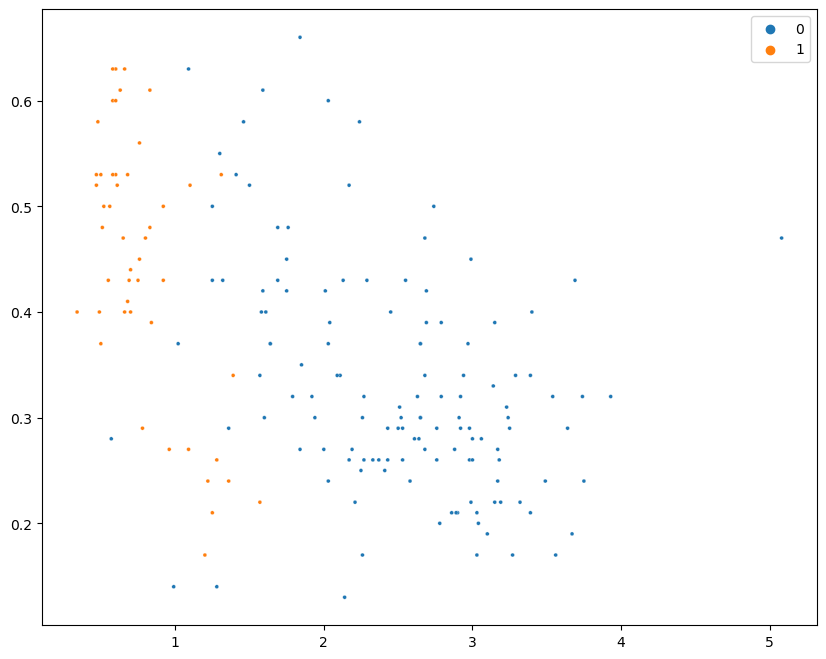

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_new[:, 0], 
                y=X_new[:, 1], 
                hue=y_new, 
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(1.1,1.3)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

![3LinSVM_8_0](https://user-images.githubusercontent.com/7457301/224625394-60a022ce-061f-46db-a2dc-d3837ac3f2d8.png)

In [ ]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=X_new[:, 0], 
                y=X_new[:, 1], 
                hue=y_new, 
                s=8);


w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(1.1, 1.3)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
plt.plot(x_points, y_points, c='r');


plt.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=.5);


w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)

![3LinSVM_9_1](https://user-images.githubusercontent.com/7457301/224625396-8b1bf3c8-b285-4051-8301-4652e9ebac4c.png)